In [23]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
%matplotlib inline
import nplab.datafile as df
import scipy.signal as sig
import scipy.constants as const
import peakutils
import numpy as np
import datetime
from peakutils.plot import plot as pplot
from parula import cm_data
from matplotlib.colors import LinearSegmentedColormap 
from matplotlib.collections import LineCollection
import os
import Alexsdatafuncs
import matplotlib.cm as cm
import time
import scipy.integrate as integrate
import scipy.special as special

In [2]:
parula_map = LinearSegmentedColormap.from_list('parula', cm_data)
copper_map = LinearSegmentedColormap.from_list('copper', cm_data)

Alex_data = Alexsdatafuncs.data_manipulators()
Alex_plot = Alexsdatafuncs.plotting_funcs()

In [3]:
colours_1 = cm.viridis(np.linspace(0,1,500))
colours_2 = cm.hot(np.linspace(0,1,500))

In [58]:
data_f.close()

In [59]:
data_f_2.close()

In [5]:
data_f = df.open_file(set_current = False)
fname = data_f.filename

C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/Seeding Au NPs from Ag/2018-11-13/2018-11-13_newNPsonSi.h5


In [24]:
data_f_2 = df.open_file(set_current = False)
fname_2 = data_f_2.filename

C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/Seeding Au NPs from Ag/2018-11-23_AuNPs_seeded_from_newNPs.h5


In [7]:
df_data_r = data_f['OceanOpticsSpectrometer']

In [26]:
df_data_2 = data_f_2['OceanOpticsSpectrometer']

In [9]:
wl = df_data_r.values()[0].attrs['wavelengths']
bg = df_data_r.values()[0].attrs['background']
ref = df_data_r.values()[0].attrs['reference']

df_data = []
for i in range (0, len(df_data_r.values())):
    df = (df_data_r.values()[i].value - bg)/(ref-bg)
    df_data.append(df)


C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in divide
  import sys


In [50]:
bg_Au = df_data_2.values()[0].attrs['background']
ref_Au = df_data_2.values()[0].attrs['reference']

df_data_Au = []
for i in range (60, len(df_data_2.values())):
    df_Au = (df_data_2.values()[i].value - bg_Au)/(ref_Au-bg_Au)
    df_data_Au.append(df_Au)
    
df_data_Ag = []
for i in range (0, len(df_data_2.values()[:60])):
    df_Ag = (df_data_2.values()[i].value - bg_Au)/(ref_Au-bg_Au)
    df_data_Ag.append(df_Ag)

In [11]:
df_data_av = np.mean(df_data, axis=0)

In [38]:
df_data_au_av = np.mean(df_data_Au, axis = 0)

In [51]:
df_data_ag_av = np.mean(df_data_Ag, axis = 0)

In [13]:
df_data_std = np.std(df_data, axis=0)/np.sqrt(len(df_data))

In [53]:
df_data_au_std = np.std(df_data_Au, axis=0)/np.sqrt(len(df_data_Au))

In [54]:
df_data_ag_std = np.std(df_data_Ag, axis=0)/np.sqrt(len(df_data_Ag))

In [15]:
Abs_Ag = np.array(np.genfromtxt("C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/Seeding Au NPs from Ag/Absorbance spectra AgNPs.txt", delimiter = "/n"))
Abs_wls = np.array(np.genfromtxt("C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/Seeding Au NPs from Ag/Wl for abs spectra on Ag Nps.txt", delimiter = "/n"))


In [16]:
df_data_av_filt = sig.savgol_filter(df_data_av, 23, 3)
df_data_std_filt = sig.savgol_filter(df_data_std, 23, 3)

C:\Users\alexc\Anaconda2\lib\site-packages\scipy\signal\_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
C:\Users\alexc\Anaconda2\lib\site-packages\scipy\signal\_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)


In [40]:
df_data_av_filt_au = sig.savgol_filter(df_data_au_av, 23, 3)
df_data_std_filt_au = sig.savgol_filter(df_data_au_std, 23, 3)

In [55]:
df_data_av_filt_ag = sig.savgol_filter(df_data_ag_av, 23, 3)
df_data_std_filt_ag = sig.savgol_filter(df_data_ag_std, 23, 3)

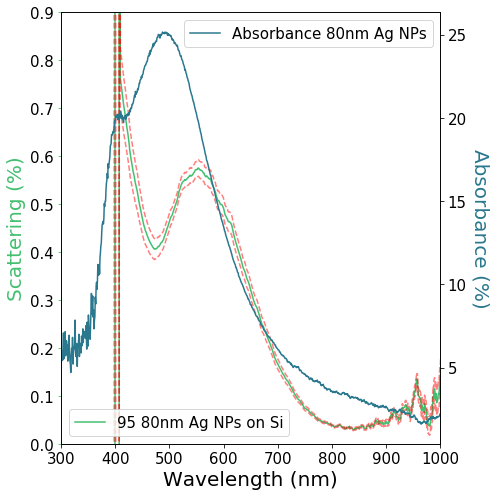

In [46]:
fig1, ax1 = plt.subplots(1, figsize = (7,7))
ax2 = ax1.twinx()
ax1.plot(wl, df_data_av_filt*100, label = "95 80nm Ag NPs on Si", color = colours_1[350])
ax1.plot(wl, df_data_av_filt*100 + df_data_std_filt*100, color = 'r', alpha = 0.5, linestyle = '--')
ax1.plot(wl, df_data_av_filt*100 - df_data_std_filt*100, color = 'r', alpha = 0.5, linestyle = '--')
#ax1.plot(wl, df_data_av_filt*100, label = "95 80nm Ag NPs on Si", color = colours_1[300])
ax2.plot(Abs_wls, Abs_Ag*100, label = "Absorbance 80nm Ag NPs", color = colours_1[200])
ax1.set_ylim(0,0.9)
ax1.set_xlim(300, 1000)
ax1.set_ylabel("Scattering (%)", fontsize = 20, color = colours_1[350])
ax1.set_xlabel("Wavelength (nm)", fontsize = 20)
ax2.set_ylabel("Absorbance (%)", fontsize = 20, color = colours_1[200], rotation = -90, va = "bottom")
ax2.set_xlabel("Wavelength (nm)", fontsize = 20)
ax1.tick_params(axis='y', labelsize=15, color = colours_1[350])
ax1.tick_params(axis='x', labelsize=15)
ax2.tick_params(axis = 'y', labelsize=15)
ax2.legend(fontsize = 15)
ax1.legend(fontsize = 15, loc = "lower left")
fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/Seeding Au NPs from Ag/Abs_vs_scatonSi.png', bbox_inches = 'tight')

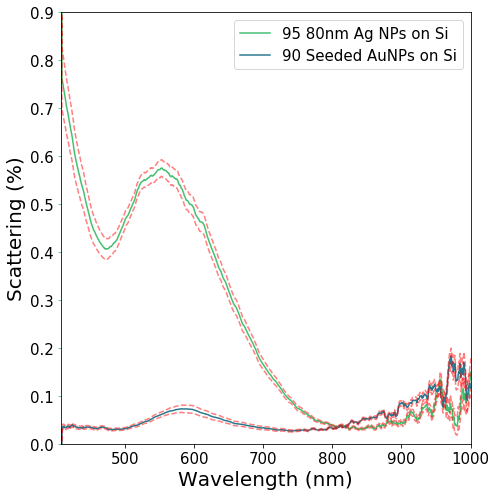

In [57]:
fig1, ax1 = plt.subplots(1, figsize = (7,7))
ax1.plot(wl, df_data_av_filt*100, label = "95 80nm Ag NPs on Si", color = colours_1[350])
ax1.plot(wl, df_data_av_filt*100 + df_data_std_filt*100, color = 'r', alpha = 0.5, linestyle = '--')
ax1.plot(wl, df_data_av_filt*100 - df_data_std_filt*100, color = 'r', alpha = 0.5, linestyle = '--')
ax1.plot(wl, df_data_av_filt_au*100, color = colours_1[200], label = "90 Seeded AuNPs on Si")
ax1.plot(wl, df_data_av_filt_au*100 + df_data_std_filt_au*100, color = 'r', alpha = 0.5, linestyle = '--')
ax1.plot(wl, df_data_av_filt_au*100 - df_data_std_filt_au*100, color = 'r', alpha = 0.5, linestyle = '--')
#ax1.plot(wl, df_data_av_filt_ag*100)
#ax1.plot(wl, df_data_av_filt*100, label = "95 80nm Ag NPs on Si", color = colours_1[300])
ax1.set_ylim(0,0.9)
ax1.set_xlim(408, 1000)
ax1.set_ylabel("Scattering (%)", fontsize = 20)
ax1.set_xlabel("Wavelength (nm)", fontsize = 20)
ax1.tick_params(axis='y', labelsize=15, color = colours_1[350])
ax1.tick_params(axis='x', labelsize=15)
ax1.legend(fontsize = 15)
fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/Seeding Au NPs from Ag/AgonSi_vs_SdAuonSi.png', bbox_inches = 'tight')